### Wave Equation

Problem setting: one-dimensional waves on a string of length L

$$
\begin{equation}
  \frac{d^2u}{dt^2} = c^2\frac{d^2u}{dx^2}   x\in(0,L), t\in(0,T]
\end{equation}
$$

with two initial conditions:

1. the initial shape of the string

    \begin{equation}
    u(x,0) = I(x)
    \end{equation}

2. reflecting that the initial velocity of the string is zero
\begin{equation}
\frac{d}{dt}u(x,0) = 0
\end{equation}

and boundary conditions:
\begin{equation}
u(0,t) = 0
\end{equation}

\begin{equation}
u(L,t) = 0
\end{equation}


The constant c and the function I(x) must be prescribed

Concrete example

\begin{equation}
u(x,0) = A \sin(\frac{\pi}{L} x)
\end{equation}

\begin{equation}
u_e(0,t) = u_e(L,t) = 0
\end{equation}


analytic solution is

\begin{equation}
u_e(x,y,t) = A \sin(\frac{\pi}{L} x)\cos(\frac{\pi}{L} ct) 
\end{equation}



In [1]:
import numpy as np
def initial(A, x):
    return A * np.sin((np.pi/L)*x)

def analytic(A,x,c, t):
    return A * np.sin((np.pi/L)*x)*np.cos((np.pi/L)*c*t)

A = 1.
L = 1
c = 1
x = np.linspace(0,1,100)
y0 = initial(A, x)
y = analytic(A, x, c, 1)

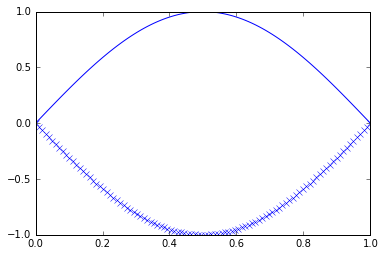

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y0,'b')
plt.plot(x,y, 'x')

In [3]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

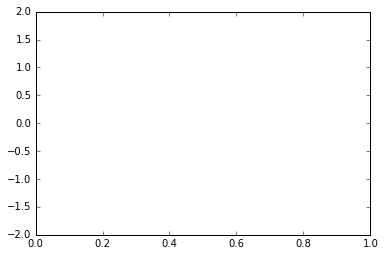

In [4]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-2,2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    c = 1
    x = np.linspace(0, 1, 500)
    #t = i/100.
    y =  A * np.sin((np.pi/L)*x)*np.cos((np.pi/L)*c*i)
    line.set_data(x, y)
    return line,


In [5]:
HTML(animation.FuncAnimation(fig, animate, init_func=init, interval=200, frames=50, blit=True).to_html5_video())

Discretization
\begin{equation}
\frac{u_i^{n+1} - 2 u_i^n + u_i^{n-1}}{\delta t^2} = c^2 \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\delta x^2} 
\end{equation}

$$
\begin{equation}
u_i^{n+1} = 2 u_i^n - u_i^{n-1} + C^2  (u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{equation}
$$

\begin{equation}
C = c \frac{\delta t}{\delta x}
\end{equation}

In [6]:
Nt = 100
Nx = 100
x, dx = np.linspace(0, 1, Nx, retstep=True)
t, dt = np.linspace(0,1, Nt, retstep=True)
c=1
C = c *dt/dx


#initial condition
u0 = initial(A, x)

#first step, du/dt = 0 ---> u_i_n-1 & u_i_n+1 are equal, v=0
u = np.zeros_like(u0)
u[1:-1] = u0[1:-1] - 0.5* C**2 * (u0[2:] -2*u0[1:-1]+u0[0:-2])
#enforce BC
u[0] = 0; u[L] = 0

#switch variables before timestepping
u_2= np.zeros_like(u0);u_1= np.zeros_like(u0) 
u_2[:], u_1[:] = u0, u
#the rest time steps
for i in range (1,Nt):
    u[1:-1] = 2 * u_1[1:-1] - u_2[1:-1] + C**2 * (u_1[2:] -2*u_1[1:-1]+u_1[0:-2])
    #BC
    u[0] = 0; u[L] = 0
    #switch variables
    u_2[:], u_1[:] = u_1, u    

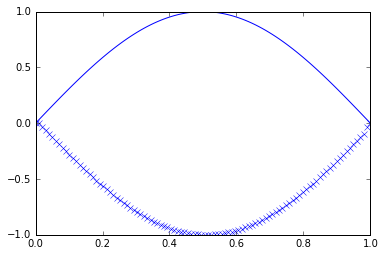

In [7]:
plt.plot(x,y0,'b')
plt.plot(x,u, 'x')

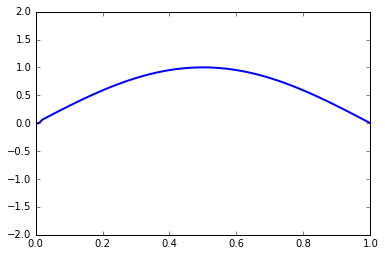

In [7]:
Nt = 100
Nx = 100
x, dx = np.linspace(0, 1, Nx, retstep=True)
t, dt = np.linspace(0,1, Nt, retstep=True)
c = 1
C = c *dt/dx


#initial condition
u0 = initial(A, x)

#first step, du/dt = 0 ---> u_i_n-1 & u_i_n+1 are equal, v=0
u = np.zeros_like(u0)
u[1:-1] = u0[1:-1] - 0.5* C**2 * (u0[2:] -2*u0[1:-1]+u0[0:-2])
#enforce BC
u[0] = 0; u[L] = 0

#plot the first step
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-2,2))
line, = ax.plot(x, u, lw=2)

#switch variables before timestepping
u_2= np.zeros_like(u0);u_1= np.zeros_like(u0)
u_2[:], u_1[:] = u0, u

def do_steps(Nt):
    #the rest time steps
    for i in range (1,Nt):
        u[1:-1] = 2 * u_1[1:-1] - u_2[1:-1] + C**2 * (u_1[2:] -2*u_1[1:-1]+u_1[0:-2])
        #BC
        u[0] = 0; u[L] = 0
        #switch variables
        u_2[:], u_1[:] = u_1, u
    line.set_ydata(u)    # update data in plot
    fig.canvas.draw()# redraw the canvas
    return line,

In [8]:
HTML(animation.FuncAnimation(fig,do_steps, range(Nt)).to_html5_video())